<a href="https://colab.research.google.com/github/girupashankar/Machine_Learning/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
color = sns.color_palette()
sns.set_style('darkgrid')

In [ ]:

# Get the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/ridge regression/kc_house_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Observation:**

### Exploratory Data Analysis (EDA) for the House Prices Dataset

#### Dataset Overview
The dataset contains 21 columns and 21,613 entries. Here are the first few rows and some basic statistics:

**Columns:**
1. `id`: Unique identifier for each house
2. `date`: Date of the house sale
3. `price`: Sale price of the house
4. `bedrooms`: Number of bedrooms
5. `bathrooms`: Number of bathrooms (including partial)
6. `sqft_living`: Square footage of the living space
7. `sqft_lot`: Square footage of the lot
8. `floors`: Number of floors
9. `waterfront`: Whether the house is a waterfront property (binary)
10. `view`: Quality of the view from the house
11. `condition`: Condition of the house
12. `grade`: Overall grade given to the housing unit, based on King County grading system
13. `sqft_above`: Square footage of the house apart from basement
14. `sqft_basement`: Square footage of the basement
15. `yr_built`: Year the house was built
16. `yr_renovated`: Year the house was renovated
17. `zipcode`: ZIP code where the house is located
18. `lat`: Latitude coordinate
19. `long`: Longitude coordinate
20. `sqft_living15`: Living room area in 2015 (if data available)
21. `sqft_lot15`: Lot size area in 2015 (if data available)



In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# identify and segregate the categorial and numeric data

categorical_data = data.select_dtypes(include=['object'])
print("Categorical Data coloumns: ", categorical_data)


Categorical Data coloumns:                    date
0      20141013T000000
1      20141209T000000
2      20150225T000000
3      20141209T000000
4      20150218T000000
...                ...
21608  20140521T000000
21609  20150223T000000
21610  20140623T000000
21611  20150116T000000
21612  20141015T000000

[21613 rows x 1 columns]


In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
print("Numeric Data coloumns: ", numeric_data)

Numeric Data coloumns:                 id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basemen

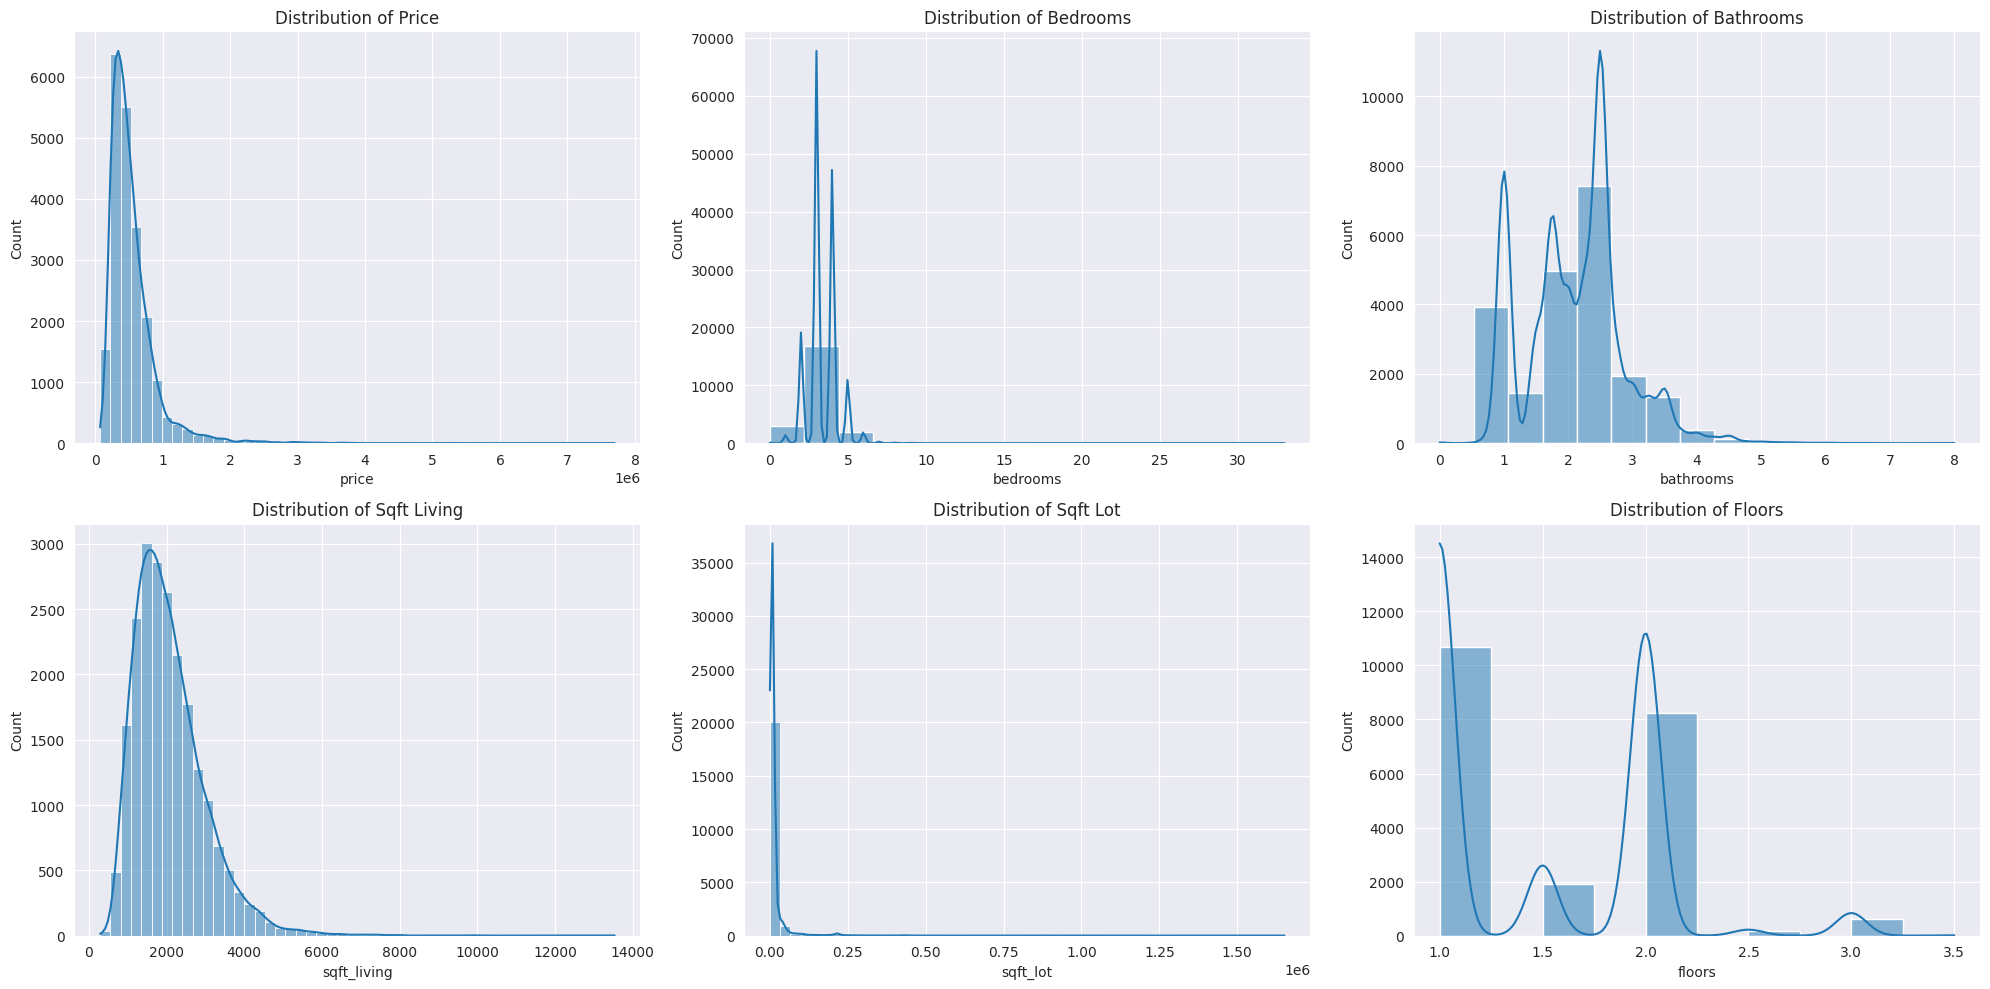

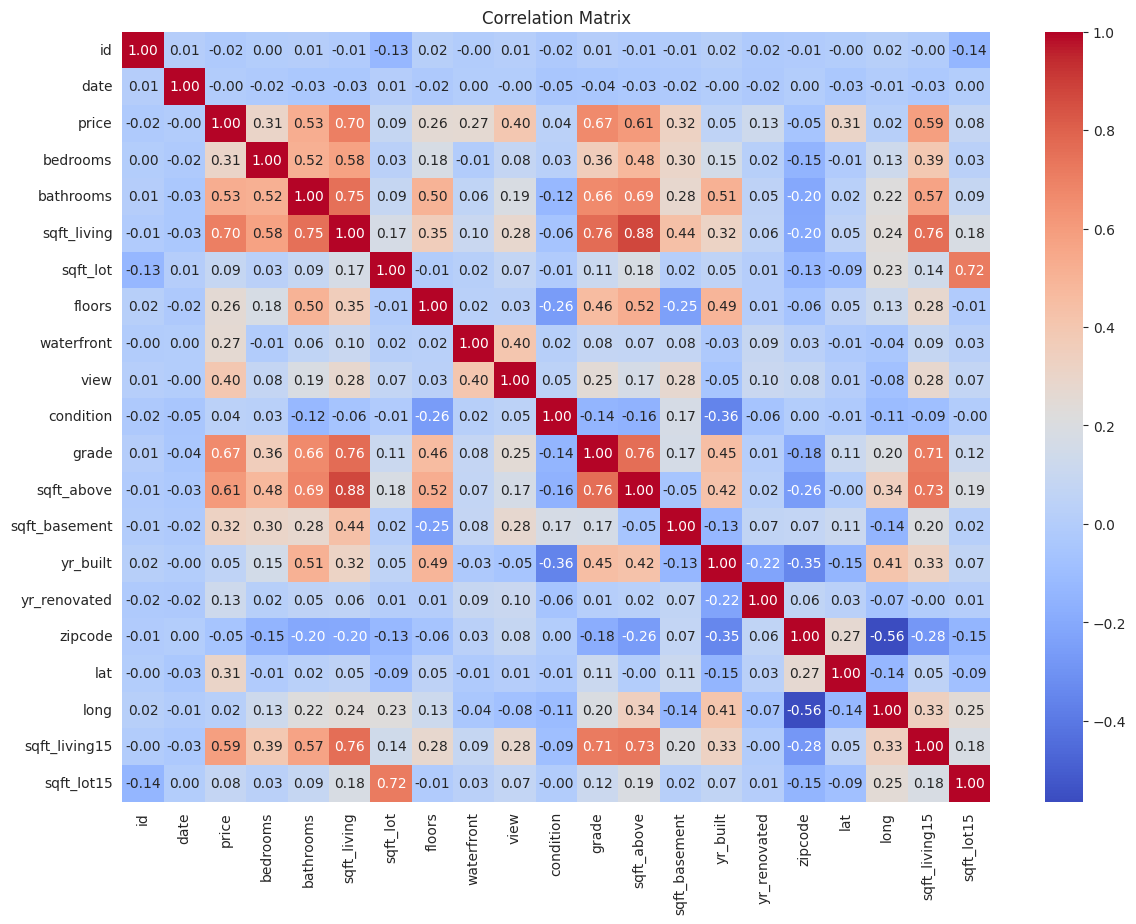

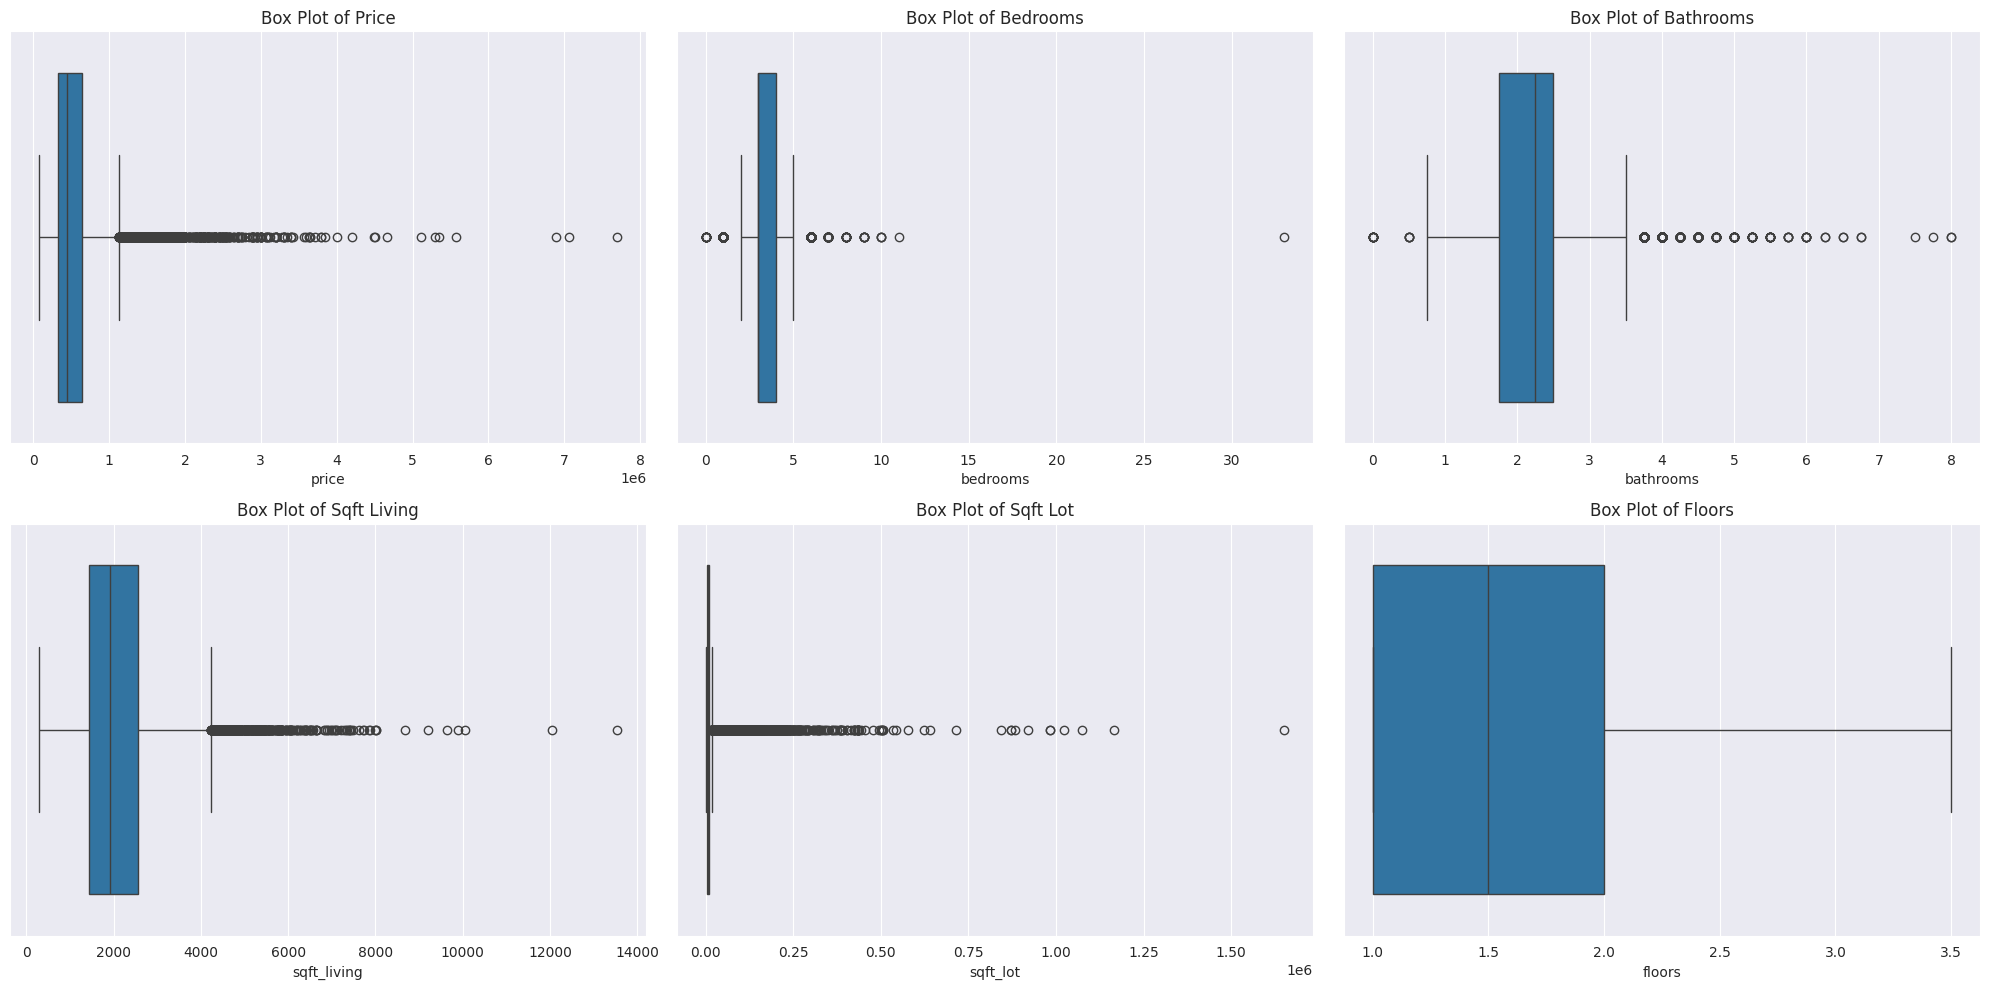

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Check for missing values
missing_values = df.isnull().sum()

# Distribution of key variables
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')

plt.subplot(2, 3, 2)
sns.histplot(df['bedrooms'], bins=15, kde=True)
plt.title('Distribution of Bedrooms')

plt.subplot(2, 3, 3)
sns.histplot(df['bathrooms'], bins=15, kde=True)
plt.title('Distribution of Bathrooms')

plt.subplot(2, 3, 4)
sns.histplot(df['sqft_living'], bins=50, kde=True)
plt.title('Distribution of Sqft Living')

plt.subplot(2, 3, 5)
sns.histplot(df['sqft_lot'], bins=50, kde=True)
plt.title('Distribution of Sqft Lot')

plt.subplot(2, 3, 6)
sns.histplot(df['floors'], bins=10, kde=True)
plt.title('Distribution of Floors')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Outlier Detection: Box plots for key variables
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')

plt.subplot(2, 3, 2)
sns.boxplot(x=df['bedrooms'])
plt.title('Box Plot of Bedrooms')

plt.subplot(2, 3, 3)
sns.boxplot(x=df['bathrooms'])
plt.title('Box Plot of Bathrooms')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['sqft_living'])
plt.title('Box Plot of Sqft Living')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['sqft_lot'])
plt.title('Box Plot of Sqft Lot')

plt.subplot(2, 3, 6)
sns.boxplot(x=df['floors'])
plt.title('Box Plot of Floors')

plt.tight_layout()
plt.show()

missing_values
